In [1]:
#conda install -c plotly plotly
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import sys
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [2]:
file = open("results-cena1-certo.pkl", "rb")
r = pickle.load(file)
r.keys()

dict_keys(['train', 'val', 'results'])

In [3]:
def SPLIT(names):

  splited = []
  for coluns in range(len(names)):
      splited.append(names[coluns].split('-'))

  return splited

In [4]:
def split(names):
  splited = []
  for coluns in range(len(names)):
      splited.append(names[coluns].split('-'))

  return splited

In [5]:
def results(a, name):
  #a= df['results'][x]
  #name = dict_keys(['train_loss', 'val_loss', 'train_acc', 'val_acc'])
  min = np.min(a[name])
  mean = np.mean(a[name])
  max = np.max(a[name])
  last = a[name][-1]

  return min, mean, max, last

In [6]:
def table(df):
  aux=[]
  for idx in range(len(df)):
    aux1=[]
   
    tr_name = split([df['train'][idx]]) # split train names
    val_name = split([df['val'][idx]]) # split val names

    d = df['results'][idx]

    t_min, t_mean, t_max, t_last = results(d, 'train_acc') #####
    v_min, v_mean, v_max, v_last = results(d, 'val_acc')
    aux1.extend([tr_name, val_name, t_min, t_mean, t_max, t_last, v_min, v_mean, v_max, v_last])
    aux.append(aux1)

  return aux


In [7]:
def filtro(df_principal,dis,rng):
    df2 = df_principal
    df_remove = df2.loc[(df2['TR_Diistance'] != dis)]
    teste = df2.drop(df_remove.index)
    df_remove2 = teste.loc[(teste['TR_Range'] != rng)]
    teste2 = teste.drop(df_remove2.index)
    
    return teste2
    

In [8]:
df = pd.DataFrame.from_dict(r)
df.tail()

train                          val  \
236   dist-x10-seed28-600d-60min  dist-x10-seed248-600d-60min   
237   dist-x10-seed28-600d-60min  dist-x10-seed505-600d-60min   
238   dist-x10-seed28-600d-60min   dist-x10-seed28-600d-60min   
239   dist-x10-seed28-600d-60min  dist-x10-seed135-600d-60min   
240  dist-x10-seed135-600d-30min  dist-x10-seed505-600d-30min   

                                               results  
236  {'train_loss': [0.8056309819221497, 1.21022772...  
237  {'train_loss': [0.8893396854400635, 1.90190017...  
238  {'train_loss': [0.8664579391479492, 1.47288787...  
239  {'train_loss': [0.9557381272315979, 1.41497135...  
240  {'train_loss': [0.914002001285553, 1.127981424...

In [9]:
header = ['train', 'val', 'tr_acc_min', 'tr_acc_mean', 'tr_acc_max', 'tr_acc_last', 'v_acc_min', 'v_acc_mean', 'v_acc_max', 'v_acc_last']
r_df = pd.DataFrame(r)
#r_df.head()

In [10]:
r1 = table(r_df)
r2 = pd.DataFrame(r1, columns=header)
r3 = r_df[['train', 'val']]
r2.drop(['train','val'], axis=1)

tr_acc_min  tr_acc_mean  tr_acc_max tr_acc_last  v_acc_min  v_acc_mean  \
0     20.666666    48.081112   59.333332   49.666668  18.666666   44.928890   
1     27.666668    59.057774   74.666664    66.66667  30.000002   57.590000   
2     34.666668    75.610001   87.000000   85.333336  30.666668   75.097778   
3     45.666668    85.484444   92.000000   88.333336  47.333332   84.115562   
4     46.000000    82.265556   90.000000        85.0  41.666664   79.706665   
..          ...          ...         ...         ...        ...         ...   
236   56.666668    65.711113   73.000000        67.0  54.666668   65.694450   
237   47.000000    64.752228   72.000000   67.333336  45.666668   64.711105   
238   48.333332    66.023331   75.666664   63.333332  46.000000   65.765556   
239   53.666668    64.473335   71.333328        65.0  51.333332   64.166664   
240   54.333336    64.604439   72.666672   63.666664  51.333332   65.132225   

     v_acc_max v_acc_last  
0    52.999996  42.333336  
1    77.666664  69.666664  
2    84.333328  80.666664  
3    90.000000  86.666664  
4    85.666672       85.0  
..         ...        ...  
236  73.333336       65.0  
237  72.333336  64.666664  
238  75.333336  60.666668  
239  70.666664  63.333332  
240  73.000000  62.666668  

[241 rows x 8 columns]

In [11]:
df_t = SPLIT(r3['train'])
df_v = SPLIT(r3['val'])

In [12]:
df = pd.concat( [ pd.DataFrame(df_t, columns=['TR_x', 'TR_Diistance', 'TR_seed', 'TR_Days','TR_Range']), 
                 pd.DataFrame(df_v, columns=['V_x', 'V_Diistance', 'V_seed', 'V_Days','V_Range']), r2 ], axis=1 )

In [13]:
df=df.drop(['train', 'val'], axis=1)
df=df.drop(['TR_x','TR_Days','V_x','V_Days'], axis=1)

In [14]:

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)
df2 = df

    TR_Diistance  TR_seed TR_Range V_Diistance   V_seed V_Range  tr_acc_min  \
0           x200  seed135   720min        x200   seed28  720min      20.667   
1           x200  seed135   720min        x200  seed248  720min      27.667   
2           x200  seed135   720min        x200   seed11  720min      34.667   
3           x200  seed135   720min        x200  seed135  720min      45.667   
4           x200  seed135   720min        x200  seed505  720min      46.000   
5             x5  seed135   720min          x5  seed248  720min      57.667   
6             x5  seed135   720min          x5  seed135  720min      47.333   
7             x5  seed135   720min          x5   seed28  720min      53.333   
8             x5  seed135   720min          x5  seed505  720min      64.333   
9             x5  seed135   720min          x5   seed11  720min      51.333   
10            x5   seed28   360min          x5  seed505  360min      48.667   
11            x5   seed28   360min          x5   see

In [15]:
grafico1 = px.parallel_categories(df, dimensions=['TR_Diistance', 'TR_Range','V_Diistance', 'V_Range'], color='v_acc_mean')
grafico1.show()

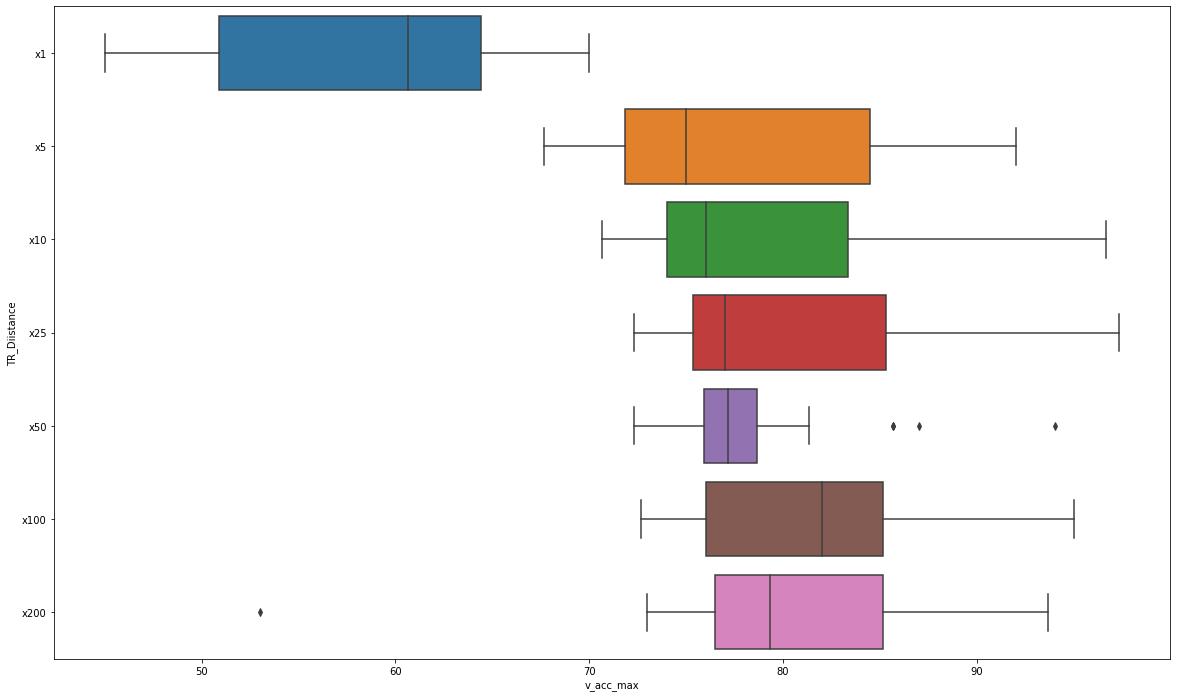

In [16]:
plt.figure(figsize=(20,12))
fig = sns.boxplot(data=df, x="v_acc_max", y="TR_Diistance", 
            order = ['x1','x5','x10','x25','x50','x100','x200'])
#fig.set(xlabel='Max Accuracy (Validation)', ylabel = 'Training dataset distance')

In [34]:
## FIGURA 1 DOS RESULTADOS DO ARTIGO - TAMANHO E FONTE OK
plt.figure(figsize=(20,12))
plt.rc('font', size=48)
plt.rcParams['figure.dpi'] = 600
fig = sns.boxplot(data=df, x="v_acc_mean", y="TR_Diistance", 
            order = ['x1','x5','x10','x25','x50','x100','x200'])
fig.set(xlabel='Mean Accuracy % (Validation)', ylabel = 'Training dataset relative distance')

[Text(0.5, 0, 'Mean Accuracy % (Validation)'),
 Text(0, 0.5, 'Training dataset relative distance')]

In [18]:
df3=df
#df3.head()

In [19]:
df3.groupby(['TR_Diistance']).mean()

tr_acc_min  tr_acc_mean  tr_acc_max  v_acc_min  v_acc_mean  \
TR_Diistance                                                               
x1             46.800000    55.503611   64.000000  43.600000   51.123112   
x10            63.548387    73.216201   80.419354  62.956989   71.901004   
x100           68.542858    76.647588   83.580952  69.371428   75.733840   
x200           61.428572    74.163397   81.733333  61.523810   73.467524   
x25            66.296296    75.176494   82.059259  66.037037   74.021505   
x5             58.066666    72.212952   79.847620  57.419048   70.307333   
x50            60.783333    71.599250   79.433333  61.158333   70.925583   

              v_acc_max  
TR_Diistance             
x1            58.299999  
x10           78.569892  
x100          81.257143  
x200          80.342857  
x25           80.444445  
x5            77.276190  
x50           78.041666

In [20]:
df3.groupby(['TR_Diistance']).max()

TR_seed TR_Range V_Diistance   V_seed V_Range  tr_acc_min  \
TR_Diistance                                                              
x1            seed505    60min          x1  seed505   60min   59.666668   
x10           seed505   720min         x10  seed505  720min   86.666664   
x100          seed505   720min        x100  seed505  720min   78.666672   
x200          seed505   720min        x200  seed505  720min   81.666664   
x25           seed505   720min         x25  seed505  720min   87.000000   
x5            seed505   720min          x5  seed505  720min   73.000000   
x50           seed505    60min         x50  seed505   60min   71.333328   

              tr_acc_mean  tr_acc_max  tr_acc_last  v_acc_min  v_acc_mean  \
TR_Diistance                                                                
x1              68.611115   76.000000    76.000000  57.000000   63.617779   
x10             94.623329   98.666672    94.000000  87.000000   92.508896   
x100            91.523331   95.333328    91.666672  82.666664   89.023323   
x200            89.565559   95.666664    93.000000  80.333336   86.562225   
x25             93.330002   98.000000    93.000000  89.666664   93.901108   
x5              86.742226   94.666664    91.000000  68.333336   85.088890   
x50             90.161110   96.000000    88.000000  72.333336   89.854439   

              v_acc_max  v_acc_last  
TR_Diistance                         
x1            70.000000   63.333332  
x10           96.666664   92.333336  
x100          95.000000   86.666664  
x200          93.666664   86.666664  
x25           97.333336   93.333336  
x5            92.000000   87.666664  
x50           94.000000   91.666672

In [21]:
df3.groupby(['TR_Diistance']).quantile([.25,.75])

tr_acc_min  tr_acc_mean  tr_acc_max  v_acc_min  v_acc_mean  \
TR_Diistance                                                                    
x1           0.25   38.749999    45.560280   54.333333  36.250001   43.526389   
             0.75   55.416669    64.908609   72.833338  50.166666   57.299725   
x10          0.25   58.833330    68.346672   75.666664  59.166664   67.071114   
             0.75   68.000004    77.021111   84.833332  70.333332   77.698891   
x100         0.25   62.666666    70.172771   78.500004  61.666668   68.924438   
             0.75   73.166668    80.608334   87.500000  76.166664   80.739998   
x200         0.25   60.333336    69.553333   77.499996  59.833336   69.616108   
             0.75   70.166664    79.442780   86.666668  68.333336   80.261669   
x25          0.25   60.333336    68.647781   76.333328  59.333332   67.816658   
             0.75   74.333336    81.524437   87.000000  75.000000   81.048897   
x5           0.25   54.500002    65.069443   73.500004  54.666668   64.630001   
             0.75   60.666668    80.188335   88.000000  60.333336   78.475555   
x50          0.25   59.916670    68.989443   77.000000  60.666668   68.454439   
             0.75   63.749998    71.618057   79.666672  63.749998   71.325003   

                   v_acc_max  
TR_Diistance                  
x1           0.25  50.916666  
             0.75  64.416662  
x10          0.25  74.000004  
             0.75  83.333328  
x100         0.25  76.000000  
             0.75  85.166668  
x200         0.25  76.499996  
             0.75  85.166668  
x25          0.25  75.333336  
             0.75  85.333336  
x5           0.25  71.833332  
             0.75  84.500000  
x50          0.25  75.916666  
             0.75  78.666672

In [22]:
df3.groupby(['TR_Diistance']).var()

tr_acc_min  tr_acc_mean  tr_acc_max   v_acc_min  v_acc_mean  \
TR_Diistance                                                                
x1            109.747365   118.539976  107.906433   78.065485   68.541218   
x10            90.241107    66.932613   56.088661   93.524014   48.977201   
x100           33.954809    35.166237   29.498973   56.887391   43.124878   
x200          178.611583    64.255796   47.894127  194.439783   67.745839   
x25            90.480912    83.197747   63.849933   94.501117   71.584578   
x5             28.815680    68.740527   66.773484   23.178714   55.211862   
x50            43.997428    23.694329   19.482622   44.746365   19.991423   

              v_acc_max  
TR_Diistance             
x1            66.326314  
x10           39.156981  
x100          31.575713  
x200          48.499917  
x25           52.222213  
x5            50.271161  
x50           16.986830

In [23]:
df3.groupby(['TR_Diistance']).std()

tr_acc_min  tr_acc_mean  tr_acc_max  v_acc_min  v_acc_mean  \
TR_Diistance                                                               
x1             10.476038    10.887607   10.387802   8.835467    8.278962   
x10             9.499532     8.181235    7.489236   9.670781    6.998371   
x100            5.827076     5.930113    5.431296   7.542373    6.566953   
x200           13.364564     8.015971    6.920558  13.944167    8.230786   
x25             9.512145     9.121280    7.990615   9.721169    8.460767   
x5              5.368024     8.290991    8.171504   4.814428    7.430468   
x50             6.633056     4.867682    4.413912   6.689272    4.471177   

              v_acc_max  
TR_Diistance             
x1             8.144097  
x10            6.257554  
x100           5.619227  
x200           6.964188  
x25            7.226494  
x5             7.090216  
x50            4.121508

In [33]:
plt.figure(figsize=(20,12))
plt.rc('font', size=48)
plt.rcParams['figure.dpi'] = 600
fig2 = sns.boxplot(data=df, x="v_acc_mean", y="TR_Range",
            order = ['10min','30min','60min','180min','360min','720min'])
fig2.set(xlabel='Mean Accuracy % (Validation)', ylabel = 'Training dataset acq. time')

[Text(0.5, 0, 'Mean Accuracy % (Validation)'),
 Text(0, 0.5, 'Training dataset acq. time')]

In [25]:
df4 = df

In [26]:
df4.groupby(['TR_Range']).max()


TR_Diistance  TR_seed V_Diistance   V_seed V_Range  tr_acc_min  \
TR_Range                                                                  
10min             x50  seed505         x50  seed505   10min   68.000000   
180min            x50  seed505         x50  seed505  180min   77.666664   
30min             x50  seed505         x50  seed505   30min   63.000000   
360min            x50   seed28         x50  seed505  360min   86.666664   
60min             x50   seed28         x50  seed505   60min   63.666664   
720min             x5  seed505          x5  seed505  720min   87.000000   

          tr_acc_mean  tr_acc_max  tr_acc_last  v_acc_min  v_acc_mean  \
TR_Range                                                                
10min       75.540001   84.666672    76.333328  68.000000   74.877777   
180min      91.523331   96.000000    91.666672  76.666664   89.854439   
30min       72.971115   81.666664    75.333336  64.666664   72.551109   
360min      94.623329   98.666672    94.000000  87.000000   92.508896   
60min       72.352226   79.666672    72.666672  66.333336   72.418892   
720min      91.343330   96.333328    93.000000  89.666664   93.901108   

          v_acc_max  v_acc_last  
TR_Range                         
10min     81.333336   77.666664  
180min    95.000000   91.666672  
30min     79.333336   76.333328  
360min    96.666664   93.333336  
60min     81.000000   75.333336  
720min    97.333336   93.000000

In [27]:
df4.groupby(['TR_Range']).mean()

tr_acc_min  tr_acc_mean  tr_acc_max  v_acc_min  v_acc_mean  \
TR_Range                                                               
10min      62.542857    70.556318   77.904762  62.066667   70.152538   
180min     61.095238    70.819523   78.171428  59.971429   68.473808   
30min      56.419355    68.152544   76.301075  56.903226   68.044875   
360min     63.988889    74.362444   81.750000  61.983333   70.661352   
60min      53.577778    63.010704   70.911112  53.255556   62.735112   
720min     67.580001    80.391467   87.266667  69.613333   80.382822   

          v_acc_max  
TR_Range             
10min     77.323809  
180min    75.209524  
30min     75.677419  
360min    77.150000  
60min     70.433333  
720min    85.546667

In [28]:
df4.groupby(['TR_Range']).std()

tr_acc_min  tr_acc_mean  tr_acc_max  v_acc_min  v_acc_mean  \
TR_Range                                                               
10min       2.489304     1.833221    1.994391   2.374703    1.762514   
180min      9.465303    10.813664   10.232708   9.274102   10.680051   
30min       6.356081     2.119469    2.145373   6.429212    2.129159   
360min      8.448797     9.047945    8.130439   8.849745    9.106600   
60min      10.664128    10.667950    9.985021  11.262008   10.790473   
720min     13.870933     6.726619    5.469354  14.938173    6.901019   

          v_acc_max  
TR_Range             
10min      1.727301  
180min    10.353266  
30min      2.030295  
360min     8.697776  
60min     11.013106  
720min     5.596712

In [29]:
df3.groupby(['TR_Range']).quantile([.25,.75])

tr_acc_min  tr_acc_mean  tr_acc_max  v_acc_min  v_acc_mean  \
TR_Range                                                                    
10min    0.25   61.333336    69.393887   76.666664  60.666668   68.975555   
         0.75   63.666664    71.366112   78.666672  63.499998   70.884998   
180min   0.25   56.833332    65.959442   73.000000  56.333334   64.393892   
         0.75   66.833332    79.318886   85.333332  67.000000   74.983891   
30min    0.25   51.833332    66.193886   74.666664  53.166666   66.615559   
         0.75   61.666668    69.467224   77.833332  62.000000   69.435555   
360min   0.25   58.833330    69.109999   76.249996  57.499998   66.476107   
         0.75   68.916664    79.530275   87.583336  65.750004   75.584166   
60min    0.25   50.166667    64.822504   72.166668  48.333332   64.380274   
         0.75   60.333336    69.042782   76.583330  61.000000   69.127222   
720min   0.25   65.166666    79.029726   86.000000  66.583338   79.635832   
         0.75   73.916668    83.100557   90.000000  77.583330   82.937771   

               v_acc_max  
TR_Range                  
10min    0.25  76.000000  
         0.75  78.000000  
180min   0.25  70.833332  
         0.75  81.500000  
30min    0.25  74.166668  
         0.75  77.166664  
360min   0.25  72.583338  
         0.75  81.833334  
60min    0.25  72.416670  
         0.75  76.583330  
720min   0.25  84.416664  
         0.75  87.250002

In [30]:
df3.groupby(['TR_Range']).var()


tr_acc_min  tr_acc_mean  tr_acc_max   v_acc_min  v_acc_mean  \
TR_Range                                                                
10min       6.196635     3.360701    3.977596    5.639215    3.106457   
180min     89.591968   116.935319  104.708306   86.008960  114.063494   
30min      40.399765     4.492149    4.602624   41.334765    4.533318   
360min     71.382171    81.865305   66.104046   78.317995   82.930171   
60min     113.723621   113.805165   99.700642  126.832816  116.434313   
720min    192.402771    45.247399   29.913833  223.149012   47.624067   

           v_acc_max  
TR_Range              
10min       2.983568  
180min    107.190110  
30min       4.122099  
360min     75.651311  
60min     121.288506  
720min     31.323184